DATA RETRIEVAL AND PREPARATION

In [40]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:


url = "https://openafrica.net/api/3/action/datastore_search_sql"
params = {
    "sql": "SELECT * from \"e2bcc139-4c7a-4096-945b-912a0f8b5385\" "
}

response = requests.get(url, params=params)
data = response.json()['result']['records']

# Load the dataset into a dataframe
df = pd.DataFrame(data)

# print the first five rows
df.head()

,total,state,_id,_full_text,vaccine
0,95.5,Abia,1,'95.5':3 'abia':1 'any':2,Any
1,86.4,Abia,2,'86.4':3 'abia':2 'measles':1,Measles
2,95.5,Abia,3,'1':2 '95.5':4 'abia':3 'penta':1,Penta 1
3,90.9,Abia,4,'2':3 '90.9':1 'abia':4 'penta':2,Penta 2
4,86.4,Abia,5,'3':2 '86.4':4 'abia':3 'penta':1,Penta 3


In [159]:
df.shape

(190, 4)

Data Dictionary description
total - vaccine coverage percentage
state - name of the state where the total() was collected
vaccine - type of vaccine that was administered

In [2]:
# drop the _full_text column it is unnecessary
df.drop(['_full_text'], axis=1, inplace=True)

In [29]:
# non-missing values count and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   total    190 non-null    object
 1   state    190 non-null    object
 2   _id      190 non-null    int64 
 3   vaccine  190 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.1+ KB


The non-null count equals the number of rows, so we don't have any missing values
we can also check for non-missing values using .isna().sum()

In [4]:
# count of non-missing values
df.isna().sum()

total      0
state      0
_id        0
vaccine    0
dtype: int64

Let's convert the total columns datatype from object to float, since it contains numeric values

In [30]:
# convert total from an object to numeric
df['total'] = df['total'].astype(float)


In [7]:
# summary statistics
df.describe()

,total,_id
count,190.000000,190.000000
mean,68.456842,95.500000
std,21.571869,54.992424
min,12.000000,1.000000
25%,54.725000,48.250000
50%,70.800000,95.500000
75%,86.400000,142.750000
max,99.900000,190.000000


In [10]:
pd.set_option('display.max_rows', None)

# Interested in Unique values of categorical columns


In [7]:
df['state'].unique()


array(['Abia', 'Adamawa', 'Akwa Ibom', 'Anambra', 'Bauchi', 'Bayelsa',
       'Benue', 'Borno', 'Cross River', 'Delta', 'Ebonyi', 'Edo', 'Ekiti',
       'Enugu', 'Federal Capital Territory', 'Gombe', 'Imo', 'Jigawa',
       'Kaduna', 'Kano', 'Katsina', 'Kebbi', 'Kogi', 'Kwara', 'Lagos',
       'Nasarawa', 'Niger', 'Nigeria', 'Ogun', 'Ondo', 'Osun', 'Oyo',
       'Plateau', 'Rivers', 'Sokoto', 'Taraba', 'Yobe', 'Zamfara'],
      dtype=object)

In [8]:
df['vaccine'].unique()


array(['Any', 'Measles', 'Penta 1', 'Penta 2', 'Penta 3'], dtype=object)

We can see the different types of vaccines administered for different diseases and doses, we have Measles, Penta 1, Penta 2, Penta 3

Number of rows for each unique value

In [9]:
df['vaccine'].value_counts()

Any        38
Measles    38
Penta 1    38
Penta 2    38
Penta 3    38
Name: vaccine, dtype: int64

In [10]:
df['state'].value_counts()

Abia                         5
Ogun                         5
Kebbi                        5
Kogi                         5
Kwara                        5
Lagos                        5
Nasarawa                     5
Niger                        5
Nigeria                      5
Ondo                         5
Adamawa                      5
Osun                         5
Oyo                          5
Plateau                      5
Rivers                       5
Sokoto                       5
Taraba                       5
Yobe                         5
Katsina                      5
Kano                         5
Kaduna                       5
Jigawa                       5
Akwa Ibom                    5
Anambra                      5
Bauchi                       5
Bayelsa                      5
Benue                        5
Borno                        5
Cross River                  5
Delta                        5
Ebonyi                       5
Edo                          5
Ekiti   

VISUALIZATIONS

How is the distribution of the different doses in different states?
How is the total coverage for the different vaccine types
Did they get all 3 doses?
For the different doses of vaccine, how is the coverage for each state?
Which dose is high in coverage?

Total number of vaccines
Total coverage of each vaccine

Which vaccines are popular?
Within each state which vaccines are popular?

highest and lowest vaccination coverage rates per state?

Plot a geographical graph of the distribution of vaccines from around the country



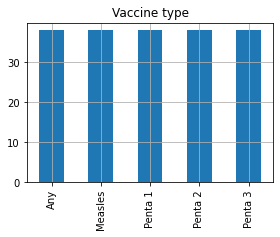

In [14]:
fig=plt.figure(figsize=(15,10))
plt.subplot2grid((3,3),(0,0))
df['vaccine'].value_counts().plot(kind="bar",title="Distribution of different Vaccine types")
plt.grid(True)

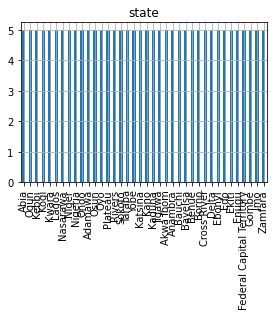

In [15]:
fig=plt.figure(figsize=(15,10))
plt.subplot2grid((3,3),(0,0))
df['state'].value_counts().plot(kind="bar",title="Distribution of state")
plt.grid(True)

In [34]:
df['total'] = pd.to_numeric(df['total'], errors='coerce')

In [35]:
df['total']

0      95.5
1      86.4
2      95.5
3      90.9
4      86.4
       ... 
185    28.2
186    20.4
187    20.8
188    17.1
189    12.0
Name: total, Length: 190, dtype: float64

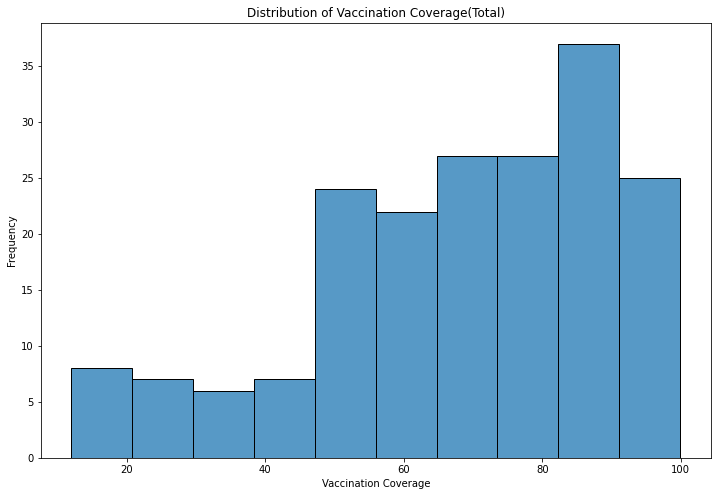

In [39]:
plt.figure(figsize=(12, 8))
df['total'] = pd.to_numeric(df['total'], errors='coerce')
sns.histplot(data=df, x='total', bins=10)
plt.xlabel('Vaccination Coverage')
plt.ylabel('Frequency')
plt.title('Distribution of Vaccination Coverage(Total)')
plt.show()

Insights from the Total column
The vaccination coverage seems to be slightly right-skewed, meaning it's not strictly normally distributed
The majority of the coverage values seem to be concentrated between 85% and 95%

It's hard to tell if we have any outliers, so Lets check if we have any outliers using IQR

In [55]:
def check_outliers(data, k=1.5):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - k*iqr
    upper_bound = q3 + k*iqr

    outliers_toremove =  [x for x in data if x < lower_bound and x > upper_bound]

    return outliers_toremove

data = df['total'].values
outliers = check_outliers(data)
print(outliers)

[]


Text(0, 0.5, 'vaccine type')

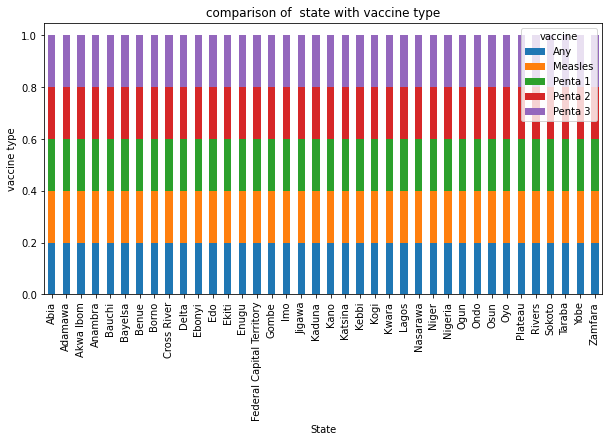

In [58]:
# How is the distribution of the different vaccine types in different states?
state=pd.crosstab(df.state,df.vaccine)
state=state.div(state.sum(1).astype(float),axis=0)
state.plot(kind='bar',stacked=True,title='comparison of state with vaccine type',figsize=(10,5))
plt.xlabel('State')
plt.ylabel('vaccine type')

Text(0.5, 1.0, 'Comparison of the vaccination coverage rate total')

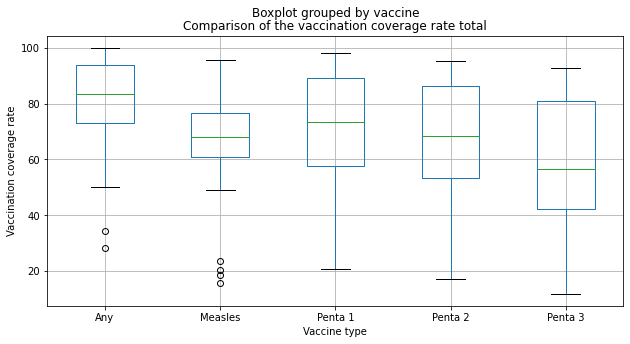

In [59]:
# How is the total coverage for the different vaccine types

df.boxplot(column='total',by='vaccine',figsize=(10,5))
plt.xlabel('Vaccine type')
plt.ylabel('Vaccination coverage rate')
plt.title('Comparison of the vaccination coverage rate total')


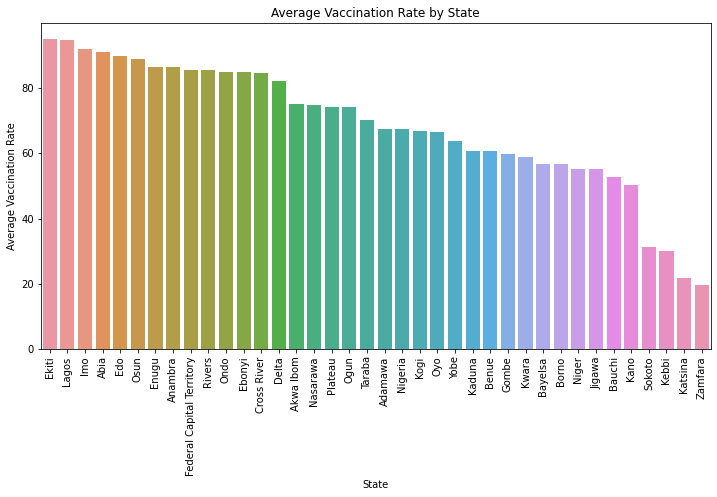

In [61]:
# For the different doses of vaccine(vaccine), how is the coverage(total) for each state(state)?

state_avg_coverage_rate = df.groupby('state')['total'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=state_avg_coverage_rate.index, y=state_avg_coverage_rate.values)
plt.xlabel('State')
plt.ylabel('Average Vaccination Rate')
plt.title('Average Vaccination Rate by State')
plt.xticks(rotation=90)
plt.show()

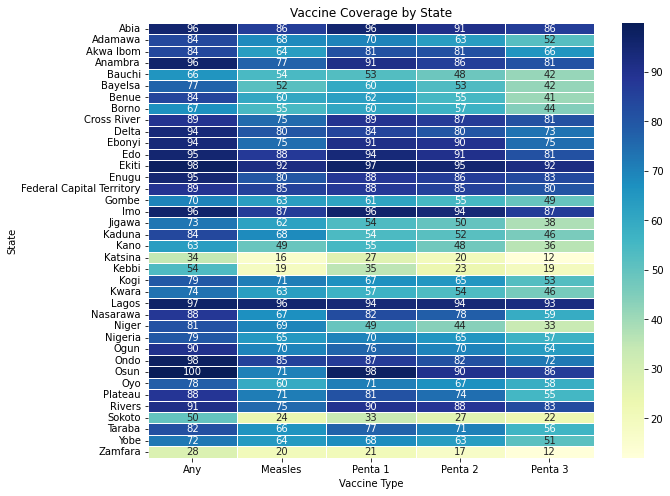

In [64]:
# Plot a map of the distribution of vaccines around the country(different states)
# Pivot the data to create a matrix with states as rows, vaccines as columns, and coverage as values
heatmap_data = df.pivot(index='state', columns='vaccine', values='total')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Vaccine Coverage by State')
plt.xlabel('Vaccine Type')
plt.ylabel('State')
plt.show()

INSIGHTS

Top 5 states with highest average vaccination coverage rate
Top 5 states with lowest average vaccination coverage rate

Top vaccines with highest coverage rate

dropout rates for the doses across the different states
    % of children dropout from pentavalent vaccination
    % of children dropout from measles vaccination
X vaccine type is not administered in state Y

Top 5 states that have the highest coverage of Penta 1 vaccine
Top 5 states that have the highest coverage of Penta 2 vaccine
Top 5 states that have the highest coverage of Penta 3 vaccine
Top 5 states that have the highest coverage of Measles vaccine

Top 5 states that have the lowest coverage of Penta 1 vaccine
Top 5 states that have the lowest coverage of Penta 2 vaccine
Top 5 states that have the lowest coverage of Penta 3 vaccine
Top 5 states that have the lowest coverage of Measles vaccine

state X,Y, and Z have the lowest coverage for all vaccine types




In [154]:
state_coverage = df.groupby('state')['total'].max().sort_values(ascending=False)
state_coverage

state
Osun                         99.9
Ekiti                        98.5
Ondo                         98.1
Lagos                        97.1
Imo                          96.2
Anambra                      96.2
Abia                         95.5
Edo                          95.3
Enugu                        94.9
Ebonyi                       94.0
Delta                        93.8
Rivers                       91.3
Ogun                         90.0
Cross River                  89.4
Federal Capital Territory    89.0
Plateau                      88.4
Nasarawa                     88.2
Benue                        84.4
Kaduna                       83.6
Akwa Ibom                    83.5
Adamawa                      83.5
Taraba                       81.7
Niger                        80.9
Nigeria                      79.3
Kogi                         79.2
Oyo                          77.8
Bayelsa                      76.7
Kwara                        73.8
Jigawa                       72.7
Yobe    

In [157]:
state_coverage = df.groupby('state')['total'].max().sort_values(ascending=False)
state_coverage

state
Osun                         99.9
Ekiti                        98.5
Ondo                         98.1
Lagos                        97.1
Imo                          96.2
Anambra                      96.2
Abia                         95.5
Edo                          95.3
Enugu                        94.9
Ebonyi                       94.0
Delta                        93.8
Rivers                       91.3
Ogun                         90.0
Cross River                  89.4
Federal Capital Territory    89.0
Plateau                      88.4
Nasarawa                     88.2
Benue                        84.4
Kaduna                       83.6
Akwa Ibom                    83.5
Adamawa                      83.5
Taraba                       81.7
Niger                        80.9
Nigeria                      79.3
Kogi                         79.2
Oyo                          77.8
Bayelsa                      76.7
Kwara                        73.8
Jigawa                       72.7
Yobe    

In [158]:
state_coveragem = df.groupby('state')['total'].min().sort_values(ascending=False)
state_coveragem

state
Lagos                        92.6
Ekiti                        92.3
Imo                          86.8
Abia                         86.4
Edo                          81.3
Federal Capital Territory    80.5
Enugu                        79.7
Anambra                      77.2
Rivers                       75.4
Cross River                  75.3
Ebonyi                       74.6
Delta                        73.4
Ondo                         72.2
Osun                         70.6
Ogun                         63.8
Akwa Ibom                    63.5
Nasarawa                     58.8
Oyo                          58.3
Nigeria                      57.2
Taraba                       56.0
Plateau                      55.4
Kogi                         52.8
Adamawa                      51.9
Yobe                         51.3
Gombe                        49.1
Kwara                        46.4
Kaduna                       45.9
Borno                        44.5
Bayelsa                      41.7
Bauchi  

In [66]:
# Top 5 states with highest average vaccination coverage rate
state_avg_coverage_rate = df.groupby('state')['total'].mean().sort_values(ascending=False).head()
state_avg_coverage_rate


state
Ekiti    95.08
Lagos    94.70
Imo      92.06
Abia     90.94
Edo      89.70
Name: total, dtype: float64

In [69]:
# Top 5 states with lowest average vaccination coverage rate
state_avg_coverage_rate_low = df.groupby('state')['total'].mean().sort_values(ascending=True).head()
state_avg_coverage_rate_low

state
Zamfara    19.70
Katsina    21.92
Kebbi      30.10
Sokoto     31.26
Kano       50.22
Name: total, dtype: float64

In [70]:
# Top vaccines with highest coverage rate
vaccinetype_avg_coverage_rate = df.groupby('vaccine')['total'].mean().sort_values(ascending=False)
vaccinetype_avg_coverage_rate

vaccine
Any        80.450000
Penta 1    71.297368
Penta 2    66.839474
Measles    65.578947
Penta 3    58.118421
Name: total, dtype: float64

In [120]:
# Which states has highest coverage for the different vaccine types
vaccinetype_avg_coverage_rate_test = df.groupby(['vaccine', 'state'])['total'].mean().groupby('vaccine').apply(lambda x: x.sort_values(ascending=False))
vaccinetype_avg_coverage_rate_test['Penta 1'].head()


vaccine  state
Penta 1  Osun     98.0
         Ekiti    96.9
         Imo      96.2
         Abia     95.5
         Lagos    94.1
Name: total, dtype: float64

In [125]:
vaccinetype_avg_coverage_rate_test['Penta 1'].tail()


vaccine  state  
Penta 1  Niger      49.2
         Kebbi      35.4
         Sokoto     33.3
         Katsina    27.3
         Zamfara    20.8
Name: total, dtype: float64

In [121]:
vaccinetype_avg_coverage_rate_test['Penta 2'].head()

vaccine  state
Penta 2  Ekiti    95.4
         Imo      94.3
         Lagos    94.1
         Abia     90.9
         Edo      90.6
Name: total, dtype: float64

In [126]:
vaccinetype_avg_coverage_rate_test['Penta 2'].tail()

vaccine  state  
Penta 2  Niger      43.7
         Sokoto     26.9
         Kebbi      23.4
         Katsina    20.1
         Zamfara    17.1
Name: total, dtype: float64

In [123]:
vaccinetype_avg_coverage_rate_test['Penta 3'].head()

vaccine  state
Penta 3  Lagos    92.6
         Ekiti    92.3
         Imo      86.8
         Abia     86.4
         Osun     86.3
Name: total, dtype: float64

In [127]:
vaccinetype_avg_coverage_rate_test['Penta 3'].tail()

vaccine  state  
Penta 3  Niger      33.3
         Sokoto     22.4
         Kebbi      19.3
         Katsina    12.0
         Zamfara    12.0
Name: total, dtype: float64

In [122]:
vaccinetype_avg_coverage_rate_test['Measles'].head()

vaccine  state
Measles  Lagos    95.6
         Ekiti    92.3
         Edo      87.5
         Imo      86.8
         Abia     86.4
Name: total, dtype: float64

In [128]:
vaccinetype_avg_coverage_rate_test['Measles'].tail()

vaccine  state  
Measles  Kano       49.0
         Sokoto     23.7
         Zamfara    20.4
         Kebbi      18.8
         Katsina    15.8
Name: total, dtype: float64

Calculating dropout rates for the pentavalent and measles vaccines
Formula:
    1. penta1 - penta3/penta1 * 100
    2. Measles - penta1/Measles * 100

In [76]:
dropout_rate1 = (vaccinetype_avg_coverage_rate['Penta 1'] - vaccinetype_avg_coverage_rate['Penta 3'])/ vaccinetype_avg_coverage_rate['Penta 1'] * 100
dropout_rate1

18.48447938581922

In [90]:
dropout_rate2 = (vaccinetype_avg_coverage_rate['Penta 1'] - vaccinetype_avg_coverage_rate['Measles'])/ vaccinetype_avg_coverage_rate['Penta 1'] * 100
dropout_rate2

8.020521906027394

In [83]:
vaccinetype_avg_coverage_ratestate= df.groupby(['state', 'vaccine'])['total'].mean().head(40)
vaccinetype_avg_coverage_ratestate

state      vaccine
Abia       Any        95.5
           Measles    86.4
           Penta 1    95.5
           Penta 2    90.9
           Penta 3    86.4
Adamawa    Any        83.5
           Measles    68.4
           Penta 1    69.9
           Penta 2    63.2
           Penta 3    51.9
Akwa Ibom  Any        83.5
           Measles    63.5
           Penta 1    81.2
           Penta 2    81.2
           Penta 3    65.9
Anambra    Any        96.2
           Measles    77.2
           Penta 1    91.1
           Penta 2    86.1
           Penta 3    81.0
Bauchi     Any        65.9
           Measles    54.5
           Penta 1    52.8
           Penta 2    48.3
           Penta 3    41.5
Bayelsa    Any        76.7
           Measles    51.7
           Penta 1    60.0
           Penta 2    53.3
           Penta 3    41.7
Benue      Any        84.4
           Measles    60.4
           Penta 1    62.5
           Penta 2    55.2
           Penta 3    40.6
Borno      Any        66.7
         

In [152]:
vaccinetype_avg_coverage_rate_test2 = df.groupby(['vaccine', 'state'])['total'].mean().groupby('state').apply(lambda x: x.sort_values(ascending=False))
vaccinetype_avg_coverage_rate_test2

state    vaccine  state  
Abia     Any      Abia       95.5
         Penta 1  Abia       95.5
         Penta 2  Abia       90.9
         Measles  Abia       86.4
         Penta 3  Abia       86.4
                             ... 
Zamfara  Any      Zamfara    28.2
         Penta 1  Zamfara    20.8
         Measles  Zamfara    20.4
         Penta 2  Zamfara    17.1
         Penta 3  Zamfara    12.0
Name: total, Length: 190, dtype: float64

In [141]:
vaccinetype_avg_coverage_rate_test2.values

array([95.5, 95.5, 90.9, 86.4, 86.4, 83.5, 69.9, 68.4, 63.2, 51.9, 83.5,
       81.2, 81.2, 65.9, 63.5, 96.2, 91.1, 86.1, 81. , 77.2, 65.9, 54.5,
       52.8, 48.3, 41.5, 76.7, 60. , 53.3, 51.7, 41.7, 84.4, 62.5, 60.4,
       55.2, 40.6, 66.7, 60.5, 57.1, 54.6, 44.5, 89.4, 89.4, 87.1, 81.2,
       75.3, 93.8, 84.4, 79.7, 79.7, 73.4, 94. , 91. , 89.6, 74.6, 74.6,
       95.3, 93.8, 90.6, 87.5, 81.3, 98.5, 96.9, 95.4, 92.3, 92.3, 94.9,
       88.1, 86.4, 83.1, 79.7, 89. , 87.8, 85.4, 85.4, 80.5, 69.7, 63. ,
       61.2, 55.2, 49.1, 96.2, 96.2, 94.3, 86.8, 86.8, 72.7, 62. , 53.7,
       49.5, 38. , 83.6, 68. , 54.1, 51.6, 45.9, 63.3, 55.1, 49. , 47.6,
       36.1, 34.4, 27.3, 20.1, 15.8, 12. , 53.6, 35.4, 23.4, 19.3, 18.8,
       79.2, 70.8, 66.7, 65.3, 52.8, 73.8, 63.1, 57.1, 53.6, 46.4, 97.1,
       95.6, 94.1, 94.1, 92.6, 88.2, 82.4, 77.6, 67.1, 58.8, 80.9, 69.4,
       49.2, 43.7, 33.3, 79.3, 69.9, 65.4, 64.7, 57.2, 90. , 76.3, 70. ,
       70. , 63.8, 98.1, 87. , 85.2, 81.5, 72.2, 99